#### Title: Sports Prediction 
Description: Sports   prediction   is   often   regarded   as   a classification issue, with one class to be predicted (win, lose, or  draw).  A  wide  variety  of  elements,  such  as  club  history, match outcomes, and player statistics, must be considered in sports  prediction  to  enable  diverse  stakeholders  comprehend the probabilities of winning or losing. 
Dataset Available:1.ATP  World  Tour  tennis  data:  This  dataset  contains tennis data from the ATP World Tour website.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pickle
from IPython.display import display

In [3]:
path_of_match_scores = "match_scores_2017_unindexed.csv"
match_scores = pd.read_csv(path_of_match_scores)

In [4]:
match_scores.head()

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Finals,1,1,Grigor Dimitrov,d875,grigor-dimitrov,...,3,62 26 63,2,1,14,11,0,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats
1,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,1,Grigor Dimitrov,d875,grigor-dimitrov,...,1,76(7) 62,2,0,13,8,1,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats
2,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,2,Kei Nishikori,n552,kei-nishikori,...,2,76(3) 63,2,0,13,9,1,0,2017-339-n552-w367,/en/scores/2017/339/MS003/match-stats
3,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,1,Milos Raonic,r975,milos-raonic,...,5,46 63 64,2,1,16,13,0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats
4,2017-339,1,brisbane,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,3,2,Stan Wawrinka,w367,stan-wawrinka,...,NaN,67(2) 64 64,2,1,18,15,0,1,2017-339-w367-e831,/en/scores/2017/339/MS007/match-stats


In [5]:
match_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tourney_year_id         3830 non-null   object
 1   tourney_order           3830 non-null   int64 
 2   tourney_slug            3830 non-null   object
 3   tourney_url_suffix      3830 non-null   object
 4   tourney_round_name      3830 non-null   object
 5   round_order             3830 non-null   int64 
 6   match_order             3830 non-null   int64 
 7   winner_name             3830 non-null   object
 8   winner_player_id        3830 non-null   object
 9   winner_slug             3830 non-null   object
 10  loser_name              3830 non-null   object
 11  loser_player_id         3830 non-null   object
 12  loser_slug              3830 non-null   object
 13  winner_seed             2480 non-null   object
 14  loser_seed              2066 non-null   object
 15  matc

In [6]:
match_scores.columns

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')

In [7]:
match_scores.drop('match_stats_url_suffix',axis=1,inplace=True)

In [8]:
match_scores.shape

(3830, 23)

In [9]:
data = match_scores

<AxesSubplot:>

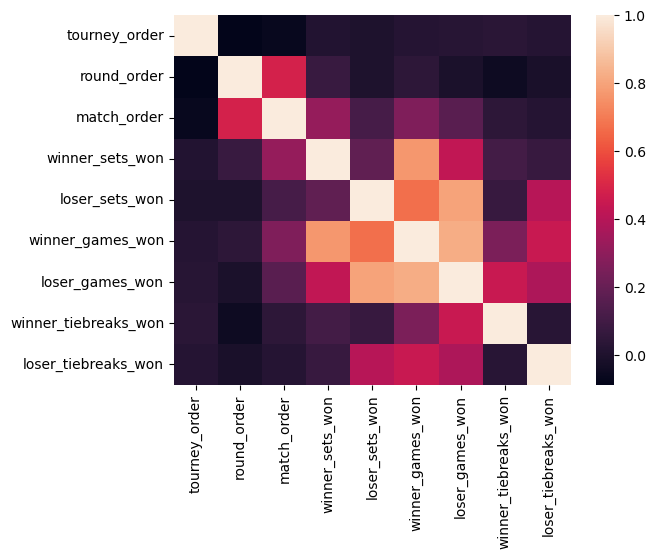

In [10]:
corr = data.corr()
sns.heatmap(corr)

### Data Preprocessing

In [11]:
data.dtypes

tourney_year_id          object
tourney_order             int64
tourney_slug             object
tourney_url_suffix       object
tourney_round_name       object
round_order               int64
match_order               int64
winner_name              object
winner_player_id         object
winner_slug              object
loser_name               object
loser_player_id          object
loser_slug               object
winner_seed              object
loser_seed               object
match_score_tiebreaks    object
winner_sets_won           int64
loser_sets_won            int64
winner_games_won          int64
loser_games_won           int64
winner_tiebreaks_won      int64
loser_tiebreaks_won       int64
match_id                 object
dtype: object

In [12]:
data['winner_seed'].unique()

array(['7', '3', '1', '2', '4', '5', nan, 'WC', '6', '8', 'Q', 'AL', 'PR',
       '8 WC', '7 WC', '17', '9', '15', '11', '12', '13', '10', '18',
       '20', '21', '23', '24', '25', '27', '29', '30', '31', '32', '14',
       '19', '22', '26', '4 WC', '5 WC', 'LL', '1 WC', 'S', '6 WC', '16',
       '28', '2 WC', '3 WC', '14 WC', '1 AL', '33'], dtype=object)

In [13]:
df = data.drop(labels=['tourney_year_id', 'tourney_slug', 'round_order',
       'loser_player_id','winner_seed', 'loser_seed', 'match_score_tiebreaks'],axis=1)

In [14]:
df.shape

(3830, 16)

In [15]:
df['win_prob'] = ((df['winner_sets_won']+df['winner_tiebreaks_won'])/(df['winner_sets_won']+df['winner_tiebreaks_won']+df['loser_sets_won']+df['loser_tiebreaks_won']))
df['lose_prob'] = 1 - df['win_prob']

In [16]:
import numpy as np
conditions = [df['win_prob'] > df['lose_prob'], 
              df['win_prob'] < df['lose_prob']]
choices = ['win', 'lose']
df['result'] = np.select(conditions, choices, default='Tie')

In [17]:
df['result'].value_counts()

win     3594
Tie      226
lose      10
Name: result, dtype: int64

<AxesSubplot:xlabel='result', ylabel='Count'>

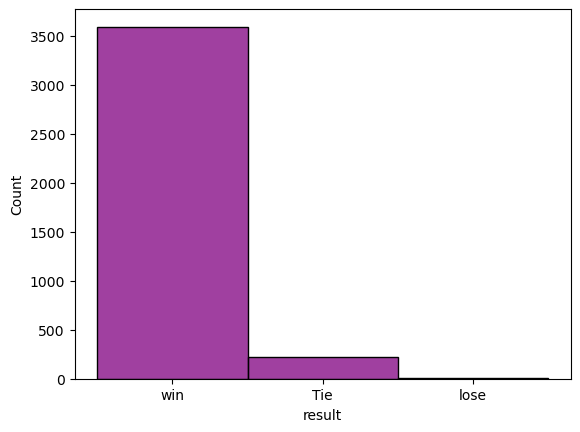

In [18]:
sns.histplot(x='result',data=df,color='purple')

In [19]:
class_count_0, class_count_1,class_count_2 = df['result'].value_counts()
class_0 = df[df['result'] == 'win']
class_1 = df[df['result'] == 'Tie']
class_2 = df[df['result'] == 'lose']
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 0: (3594, 19)
class 1: (226, 19)
class 2: (10, 19)


In [20]:
df=df.drop( ['winner_sets_won', 'loser_sets_won',
        'winner_tiebreaks_won',
       'loser_tiebreaks_won'],axis=1)

In [21]:
encoding = {"result":{'win':1 ,'lose':-1,'Tie':0}}
df=df.replace(encoding)
df.head(5)

,tourney_order,tourney_url_suffix,tourney_round_name,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_slug,winner_games_won,loser_games_won,match_id,win_prob,lose_prob,result
0,1,/en/scores/archive/brisbane/339/2017/results,Finals,1,Grigor Dimitrov,d875,grigor-dimitrov,Kei Nishikori,kei-nishikori,14,11,2017-339-d875-n552,0.666667,0.333333,1
1,1,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,1,Grigor Dimitrov,d875,grigor-dimitrov,Milos Raonic,milos-raonic,13,8,2017-339-d875-r975,1.000000,0.000000,1
2,1,/en/scores/archive/brisbane/339/2017/results,Semi-Finals,2,Kei Nishikori,n552,kei-nishikori,Stan Wawrinka,stan-wawrinka,13,9,2017-339-n552-w367,1.000000,0.000000,1
3,1,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,1,Milos Raonic,r975,milos-raonic,Rafael Nadal,rafael-nadal,16,13,2017-339-r975-n409,0.666667,0.333333,1
4,1,/en/scores/archive/brisbane/339/2017/results,Quarter-Finals,2,Stan Wawrinka,w367,stan-wawrinka,Kyle Edmund,kyle-edmund,18,15,2017-339-w367-e831,0.500000,0.500000,0


In [22]:
df.isnull().sum()

tourney_order          0
tourney_url_suffix     0
tourney_round_name     0
match_order            0
winner_name            0
winner_player_id       0
winner_slug            0
loser_name             0
loser_slug             0
winner_games_won       0
loser_games_won        0
match_id               0
win_prob              20
lose_prob             20
result                 0
dtype: int64

In [23]:
mean=df['win_prob'].mean()

In [24]:
df['win_prob'].fillna(value=mean,inplace=True)
df['lose_prob'].fillna(value=mean,inplace=True)

In [25]:
print(df)

      tourney_order                               tourney_url_suffix  \
0                 1     /en/scores/archive/brisbane/339/2017/results   
1                 1     /en/scores/archive/brisbane/339/2017/results   
2                 1     /en/scores/archive/brisbane/339/2017/results   
3                 1     /en/scores/archive/brisbane/339/2017/results   
4                 1     /en/scores/archive/brisbane/339/2017/results   
...             ...                                              ...   
3825             67  /en/scores/current/nitto-atp-finals/605/results   
3826             67  /en/scores/current/nitto-atp-finals/605/results   
3827             67  /en/scores/current/nitto-atp-finals/605/results   
3828             67  /en/scores/current/nitto-atp-finals/605/results   
3829             67  /en/scores/current/nitto-atp-finals/605/results   

     tourney_round_name  match_order  \
0                Finals            1   
1           Semi-Finals            1   
2           Sem

In [26]:
df.columns

Index(['tourney_order', 'tourney_url_suffix', 'tourney_round_name',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_slug', 'winner_games_won', 'loser_games_won',
       'match_id', 'win_prob', 'lose_prob', 'result'],
      dtype='object')

In [27]:
df2 = df.drop(['tourney_order', 'tourney_url_suffix', 'tourney_round_name',
       'match_order','winner_player_id','winner_name', 'winner_slug', 'loser_name', 'loser_slug', 'match_id'],axis=1)

In [28]:
df2.columns

Index(['winner_games_won', 'loser_games_won', 'win_prob', 'lose_prob',
       'result'],
      dtype='object')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   winner_games_won  3830 non-null   int64  
 1   loser_games_won   3830 non-null   int64  
 2   win_prob          3830 non-null   float64
 3   lose_prob         3830 non-null   float64
 4   result            3830 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 149.7 KB


### Visualization

<AxesSubplot:>

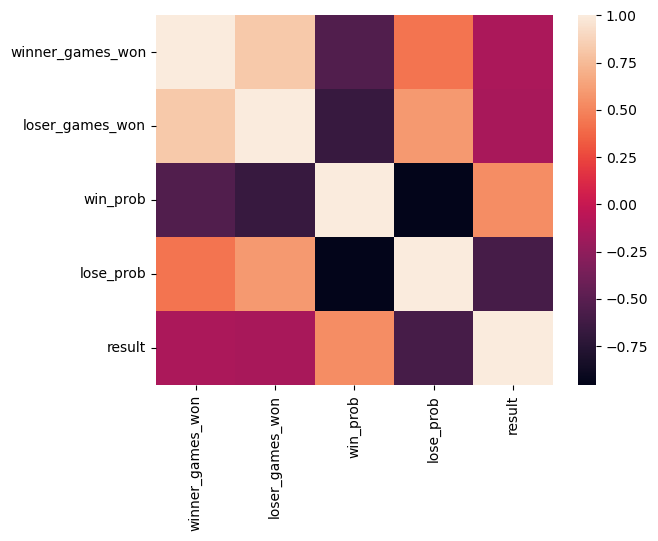

In [30]:
cr = df2.corr()
sns.heatmap(cr)

In [31]:
df2.shape

(3830, 5)

In [32]:
df2.columns

Index(['winner_games_won', 'loser_games_won', 'win_prob', 'lose_prob',
       'result'],
      dtype='object')

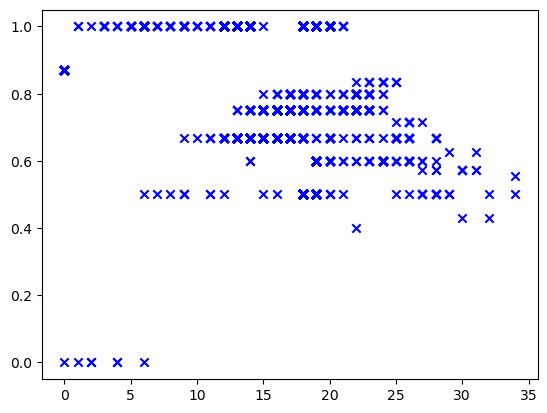

In [33]:
plt.scatter(df2['winner_games_won'],df2['win_prob'], color='blue', marker='x', label='Class A')
#plt.scatter(df2['loser_games_won'],df2['win_prob'], color='red', marker='o', label='Class B') 

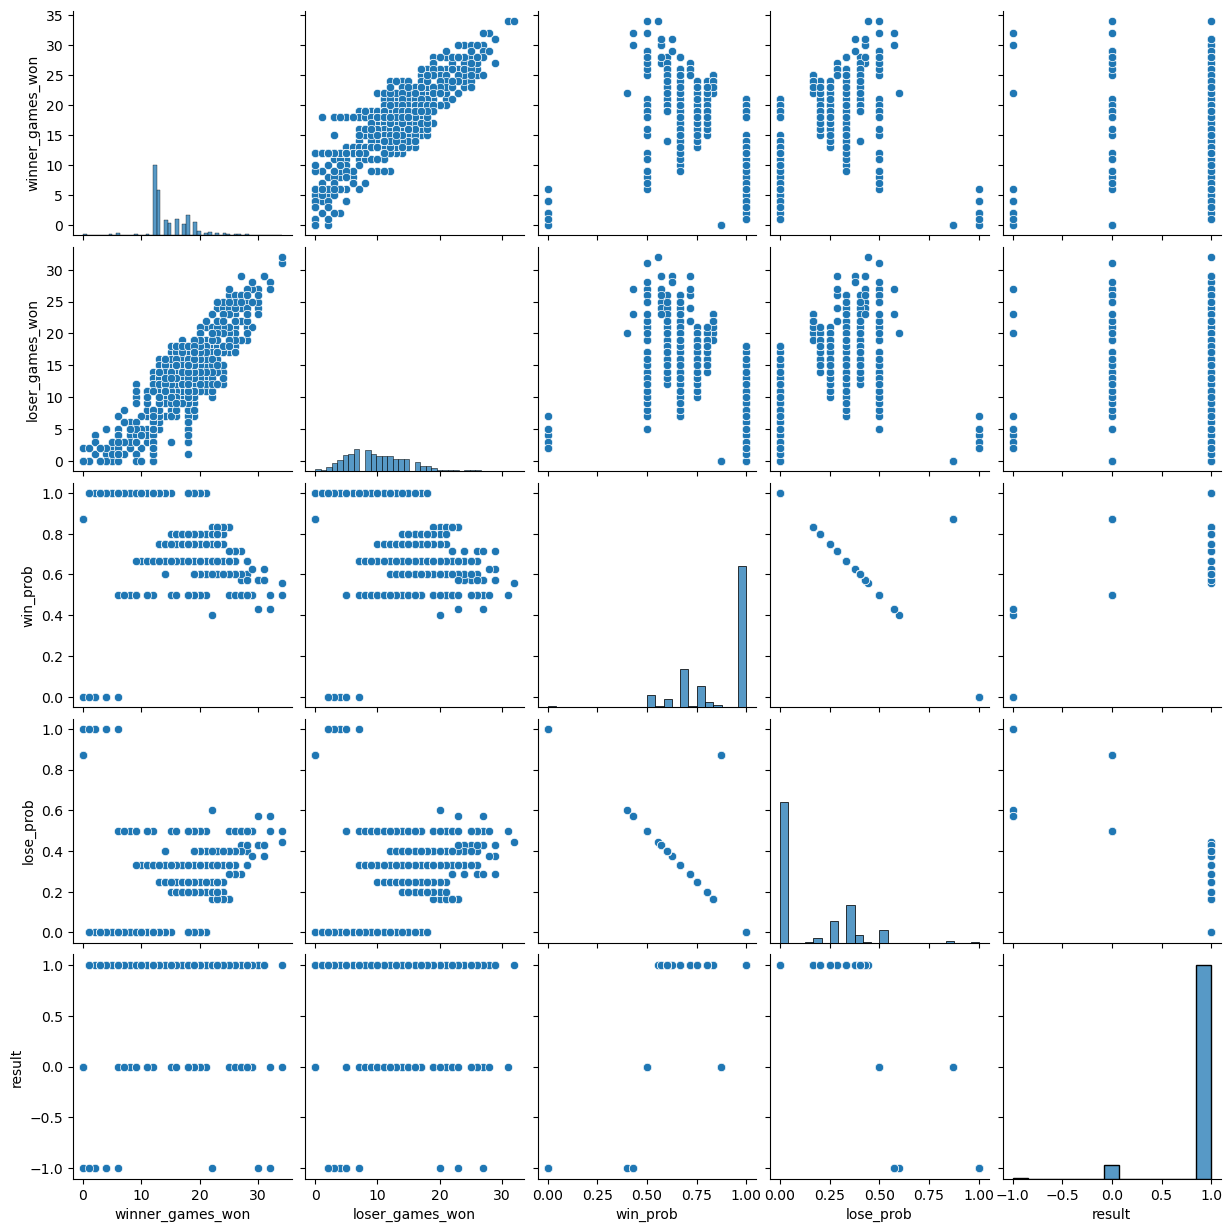

In [34]:
sns.pairplot(data=df2)

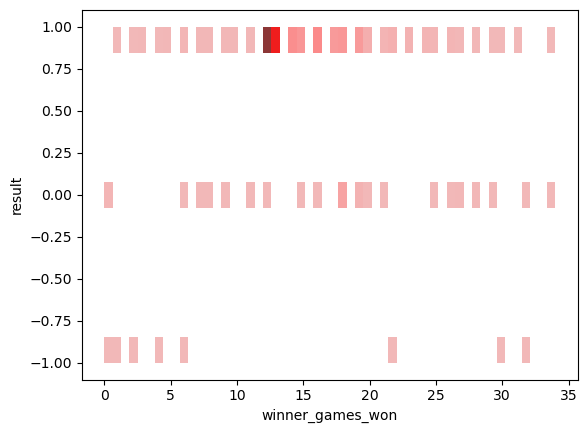

In [35]:
bar_plot1 = sns.histplot(x='winner_games_won', y='result', data=df2, label="result", color="red")

<AxesSubplot:xlabel='winner_games_won'>

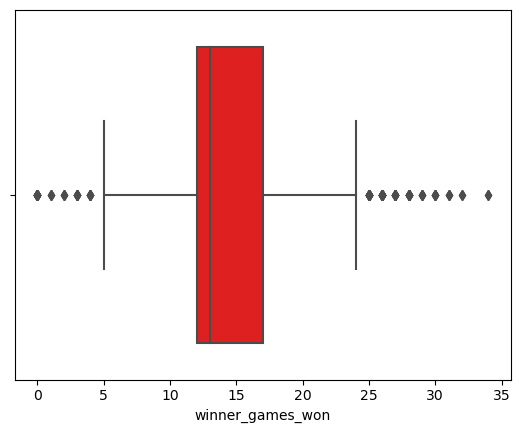

In [36]:
sns.boxplot(x='winner_games_won', data=df2, color="red")

<AxesSubplot:xlabel='loser_games_won'>

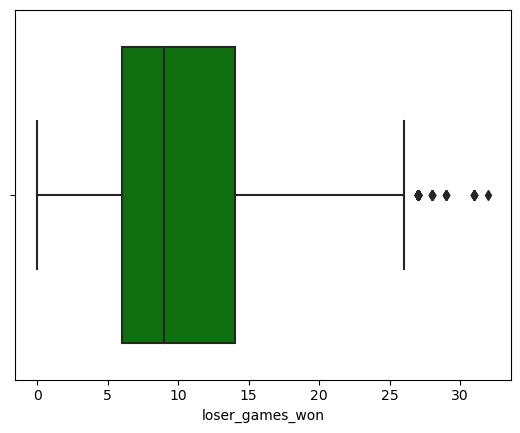

In [107]:
sns.boxplot(x='loser_games_won', data=df2, color="green")

### Cleaning the data for prediction(upsampling)

In [38]:
class_count_0, class_count_1,class_count_2 = df2['result'].value_counts()
class_0 = df2[df2['result'] == 1]
class_1 = df2[df2['result'] == 0]
class_2 = df2[df2['result'] == -1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 0 count:', class_count_0)
print('class 1 count:', class_count_1)
print('class 2 count:', class_count_2)

class 0: (3594, 5)
class 1: (226, 5)
class 2: (10, 5)
class 0 count: 3594
class 1 count: 226
class 2 count: 10


total class of 2, 1 and 0: 
  1    3594
 0    1000
-1    1000
Name: result, dtype: int64


<AxesSubplot:xlabel='result', ylabel='Count'>

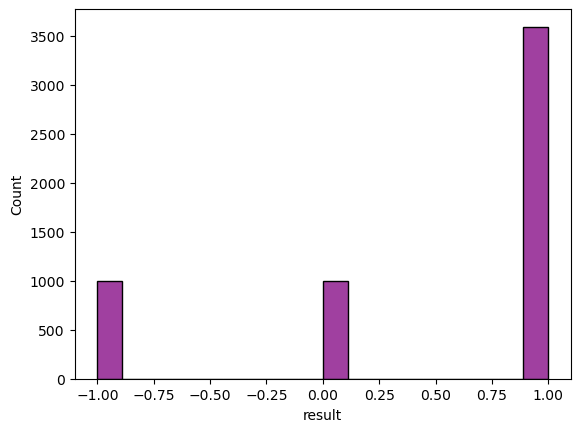

In [39]:
#class_0_under = class_0.sample(1000,random_state=117)
class_2_upper = class_2.sample(1000,random_state=117,replace=True)
class_1_upper = class_1.sample(1000,random_state=117,replace=True)
df2 = pd.concat([class_0,class_1_upper, class_2_upper], ignore_index=True,axis=0)
print("total class of 2, 1 and 0:","\n",df2['result'].value_counts())
sns.histplot(x='result',data=df2,color='purple')

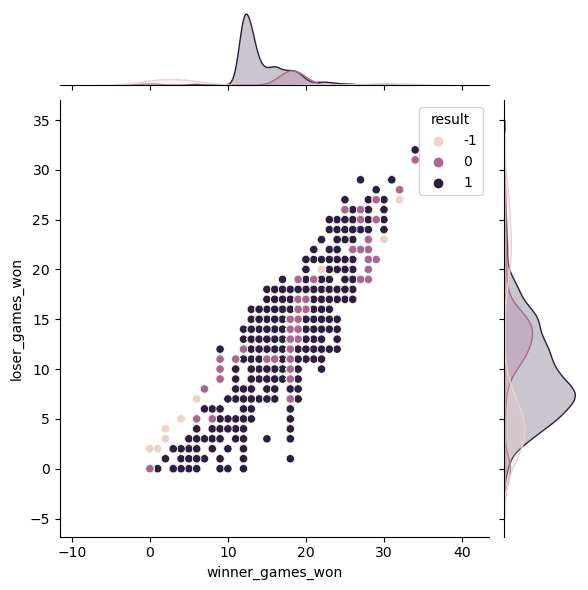

In [40]:
sns.jointplot(x='winner_games_won',y='loser_games_won',data=df2,hue='result',kind='scatter')

In [41]:
df2.to_csv('datasportsatp.csv',index=False)

In [42]:
from sklearn.model_selection import train_test_split
x=df2.iloc[: , [0,1]]
y=df2.iloc[: , -1]

In [43]:
df2.iloc[: , [0,1]].columns

Index(['winner_games_won', 'loser_games_won'], dtype='object')

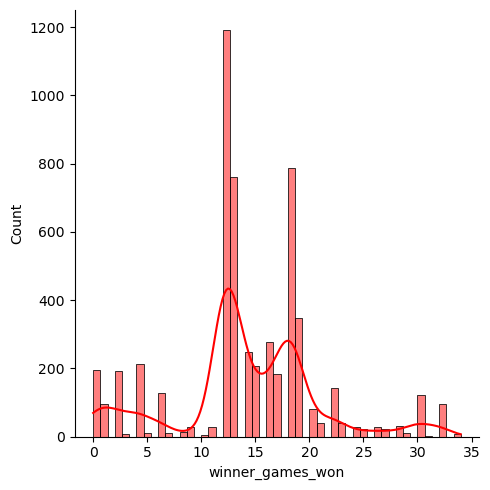

In [44]:
sns.displot(x.iloc[:,0],kde=True,color='red')

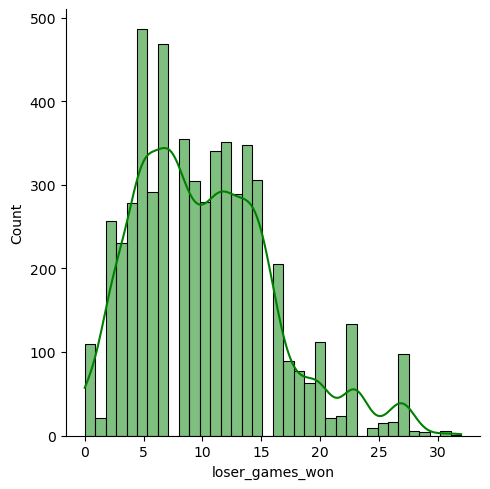

In [45]:
sns.displot(x.iloc[:,1],kde=True,color='green')

In [46]:
x=x.fillna(0.1)

In [47]:
x.isnull().sum()

winner_games_won    0
loser_games_won     0
dtype: int64

In [48]:
y.value_counts()

 1    3594
 0    1000
-1    1000
Name: result, dtype: int64

In [49]:
"""from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x,y = smote.fit_resample(x, y)"""

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state = 42)\nx,y = smote.fit_resample(x, y)'

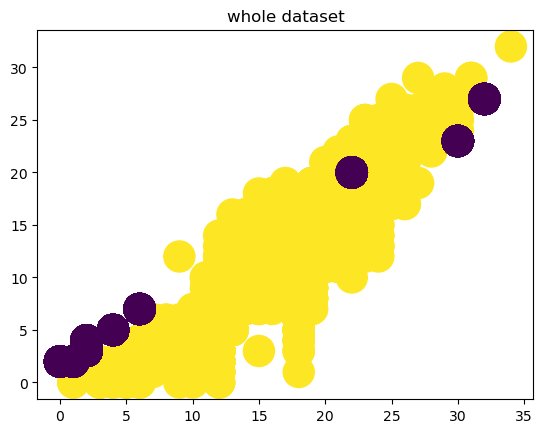

In [50]:
fig, ax = plt.subplots()
# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x.iloc[:,0], y = x.iloc[:,1],c=y, s=np.abs(y)*500)
ax.set(title="whole dataset")
plt.show()

<AxesSubplot:xlabel='result', ylabel='Count'>

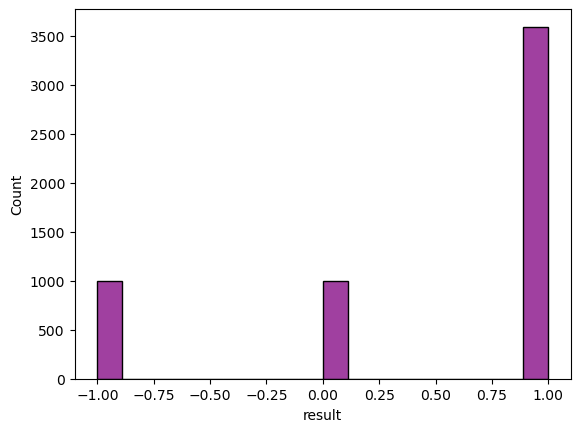

In [51]:
sns.histplot(data=y,color='purple')

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
y_train.value_counts()

 1    2498
-1     709
 0     708
Name: result, dtype: int64

### Model 1 Perceptron with 1000 itterations

In [54]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=1000)

In [55]:
print(model.get_params())

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [56]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [57]:
pickle.dump(model, open('perceptron.pkl', 'wb'))

<AxesSubplot:title={'center':'Classification report'}, xlabel='Metric', ylabel='Class'>

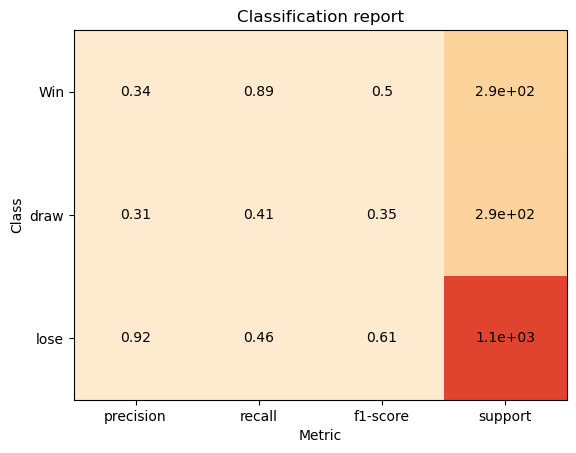

In [58]:
from sklearn_evaluation import plot
plot.classification_report(y_test,y_pred,target_names=['Win','draw','lose'])

<AxesSubplot:>

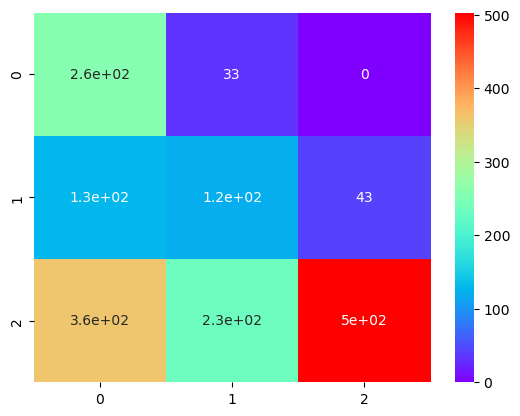

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='rainbow')

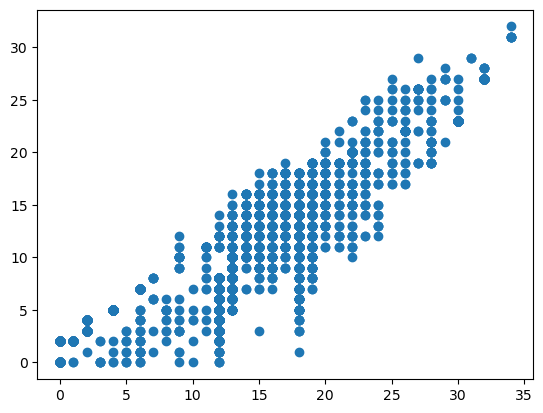

In [60]:
plt.scatter(x.iloc[:,0],x.iloc[:,1])

In [61]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(f'Accuracy score of perceptron: {ac*100 :.2f}%')

Accuracy score of perceptron: 52.47%


### Lazy Predict

In [62]:
from lazypredict.Supervised import LazyClassifier

In [63]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:13<00:00,  2.11it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.96,0.97,None,0.96,0.26
BaggingClassifier,0.96,0.97,None,0.96,0.05
LGBMClassifier,0.96,0.96,None,0.96,0.45
ExtraTreesClassifier,0.96,0.96,None,0.96,0.20
DecisionTreeClassifier,0.95,0.96,None,0.95,0.02
ExtraTreeClassifier,0.95,0.96,None,0.95,0.01
KNeighborsClassifier,0.95,0.95,None,0.95,0.05
SVC,0.88,0.87,None,0.89,0.54
AdaBoostClassifier,0.81,0.67,None,0.75,0.24


### Model 2 Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(criterion='entropy')

In [65]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [66]:
params = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800]
}

In [67]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = params, n_jobs = -1, verbose = 1)

In [68]:
"grid_search.fit(x_train,y_train)"

'grid_search.fit(x_train,y_train)'

In [69]:
"grid_search.best_params_"

'grid_search.best_params_'

In [70]:
rf  = RandomForestClassifier(criterion='entropy',max_depth= 20,min_samples_leaf= 1,min_samples_split= 5,n_estimators= 600)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=600)

In [72]:
y_pred_rf = rf.predict(x_test)

<AxesSubplot:title={'center':'Classification report'}, xlabel='Metric', ylabel='Class'>

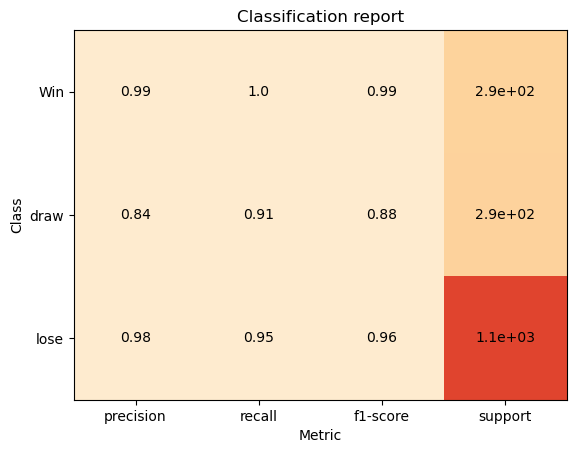

In [73]:
from sklearn_evaluation import plot
plot.classification_report(y_test,y_pred_rf,target_names=['Win','draw','lose'])

<AxesSubplot:>

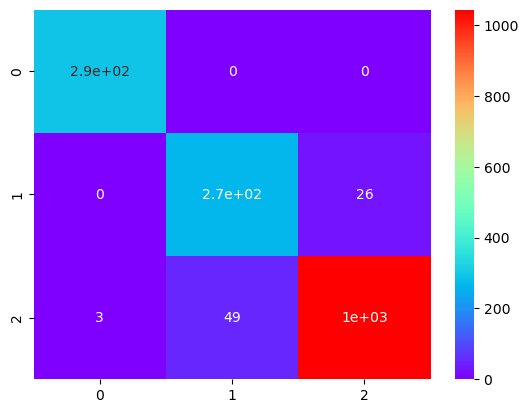

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,cmap='rainbow')

In [75]:
from sklearn.metrics import accuracy_score
ac_rf = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy score of perceptron: {ac_rf*100 :.2f}%')

Accuracy score of perceptron: 95.35%


### Model 3 Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [77]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dt = dt.predict(x_test)

<AxesSubplot:title={'center':'Classification report'}, xlabel='Metric', ylabel='Class'>

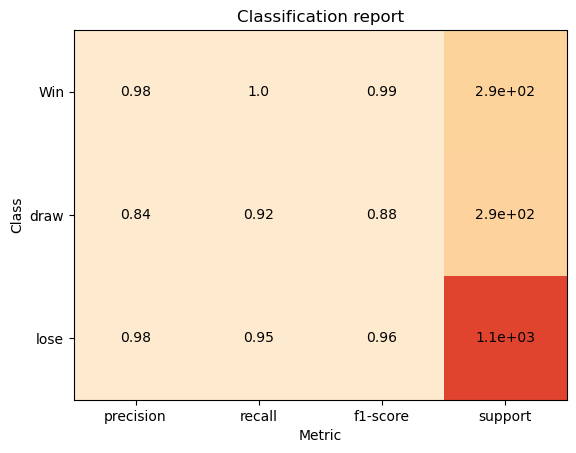

In [79]:
from sklearn_evaluation import plot
plot.classification_report(y_test,y_pred_dt,target_names=['Win','draw','lose'])

<AxesSubplot:>

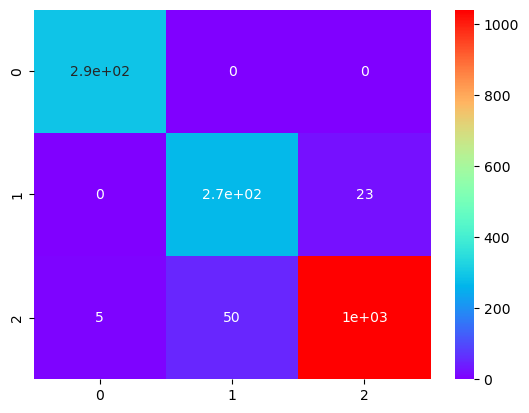

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,cmap='rainbow')

In [81]:
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy score of perceptron: {ac_dt*100 :.2f}%')

Accuracy score of perceptron: 95.35%


[Text(0.2588002873563218, 0.9615384615384616, 'X[0] <= 6.5\ngini = 0.527\nsamples = 3915\nvalue = [709, 708, 2498]'),
 Text(0.05747126436781609, 0.8846153846153846, 'X[1] <= 1.5\ngini = 0.302\nsamples = 607\nvalue = [501, 70, 36]'),
 Text(0.022988505747126436, 0.8076923076923077, 'X[0] <= 0.5\ngini = 0.344\nsamples = 86\nvalue = [0, 67, 19]'),
 Text(0.011494252873563218, 0.7307692307692307, 'gini = 0.0\nsamples = 67\nvalue = [0, 67, 0]'),
 Text(0.034482758620689655, 0.7307692307692307, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.09195402298850575, 0.8076923076923077, 'X[0] <= 4.5\ngini = 0.074\nsamples = 521\nvalue = [501, 3, 17]'),
 Text(0.05747126436781609, 0.7307692307692307, 'X[0] <= 2.5\ngini = 0.014\nsamples = 425\nvalue = [422, 0, 3]'),
 Text(0.04597701149425287, 0.6538461538461539, 'gini = 0.0\nsamples = 281\nvalue = [281, 0, 0]'),
 Text(0.06896551724137931, 0.6538461538461539, 'X[1] <= 3.5\ngini = 0.041\nsamples = 144\nvalue = [141, 0, 3]'),
 Text(0.05747126436781

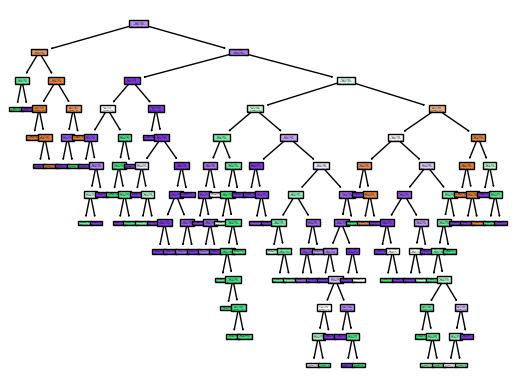

In [82]:
from sklearn import tree 
tree.plot_tree(dt,filled=True)

### Model 4 K nearest neighbors with k as 4 

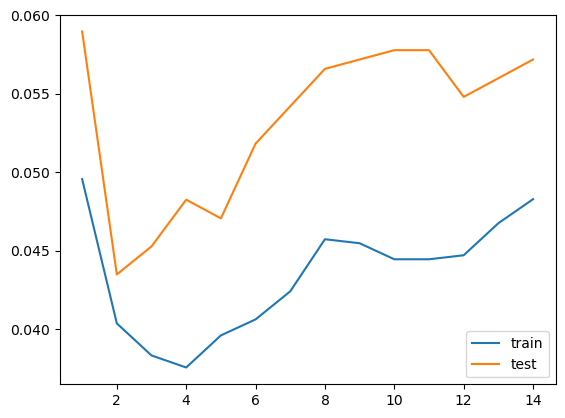

In [83]:
from sklearn.neighbors import KNeighborsClassifier

error1,error2 = [],[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))

plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.legend()
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9517569982132221

In [85]:
y_pred_knn = knn.predict(x_test)

<AxesSubplot:title={'center':'Classification report'}, xlabel='Metric', ylabel='Class'>

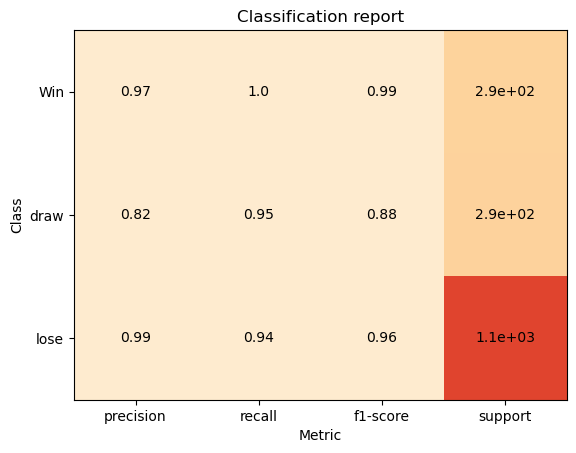

In [86]:
from sklearn_evaluation import plot
plot.classification_report(y_test,y_pred_knn,target_names=['Win','draw','lose'])

<AxesSubplot:>

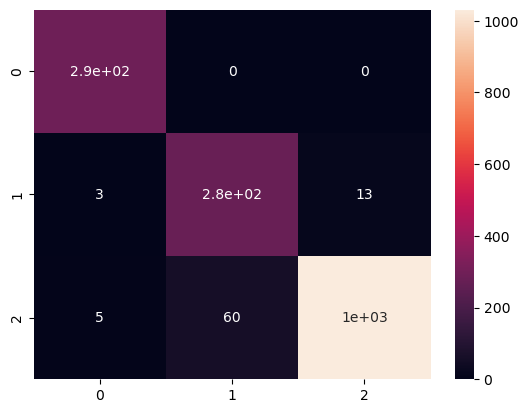

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True)

In [88]:
from sklearn.metrics import accuracy_score
ac_knn = accuracy_score(y_test,y_pred_knn)
print(f'Accuracy score of perceptron: {ac_knn*100 :.2f}%')

Accuracy score of perceptron: 95.18%


### Model 5 Agglomerative Clustering 

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [90]:
data = list(zip(x.iloc[:,0], x.iloc[:,1]))

In [91]:
linkage_data = linkage(data, method='ward', metric='euclidean')

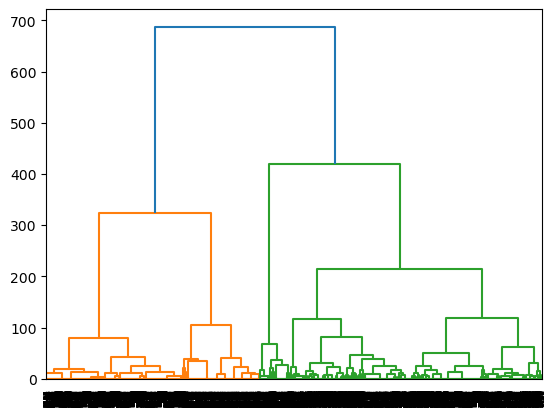

In [92]:
dendrogram(linkage_data)
plt.show()

In [93]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [94]:
labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[0 1 0 ... 1 0 0]


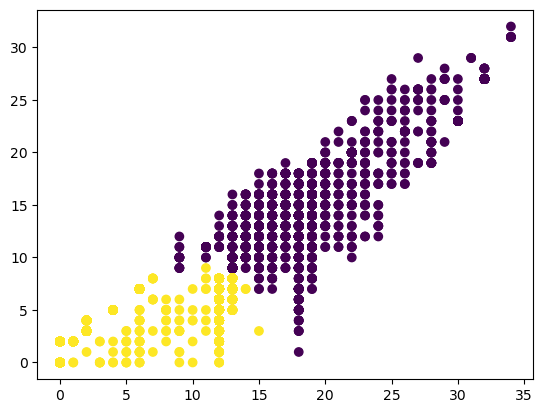

In [95]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=labels)
plt.show()

### Model 6 Support Vector Machine classifier

In [96]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [97]:
svm.score(x_test,y_test)

0.8844550327575939

In [98]:
y_pred_svm = svm.predict(x_test)

<AxesSubplot:title={'center':'Classification report'}, xlabel='Metric', ylabel='Class'>

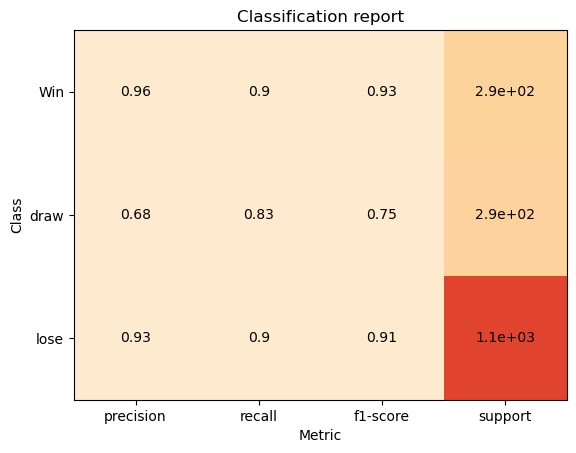

In [99]:
from sklearn_evaluation import plot
plot.classification_report(y_test,y_pred_svm,target_names=['Win','draw','lose'])

<AxesSubplot:>

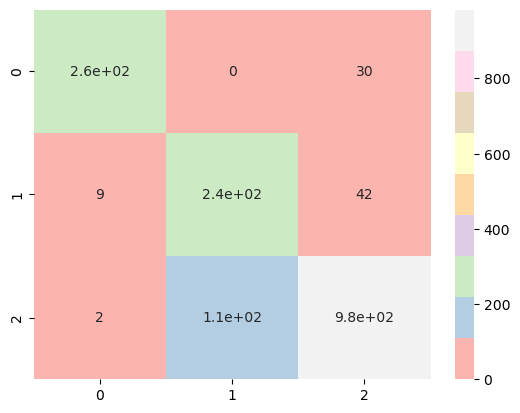

In [100]:
from sklearn import metrics

sns.heatmap(metrics.confusion_matrix(y_test,y_pred_svm),annot=True,cmap='Pastel1')

In [101]:
from sklearn.metrics import accuracy_score
ac_svm = accuracy_score(y_test,y_pred_svm)
print(f'accuracy: {ac_svm*100 :.2f}%')

accuracy: 88.45%


### Comparitive study

In [102]:
accuracy_values = []
accuracy_values.append(ac)
accuracy_values.append(ac_dt)
accuracy_values.append(ac_rf)
accuracy_values.append(ac_knn)
accuracy_values.append(ac_svm)

In [103]:
print(accuracy_values)

[0.5247170935080405, 0.9535437760571769, 0.9535437760571769, 0.9517569982132221, 0.8844550327575939]


In [104]:
print(sorted(accuracy_values))

[0.5247170935080405, 0.8844550327575939, 0.9517569982132221, 0.9535437760571769, 0.9535437760571769]


In [105]:
labels = ['perceptron','svm','knn','dt','rf']

[]

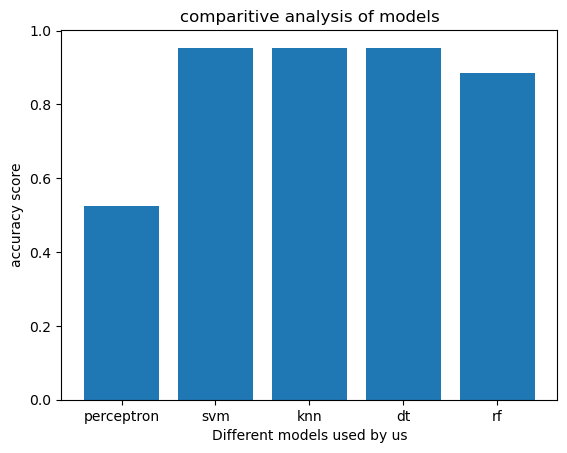

In [106]:
plt.bar(labels,accuracy_values)
plt.title("comparitive analysis of models")
plt.xlabel("Different models used by us")
plt.ylabel("accuracy score")
plt.plot()